In [1]:
import torch
from torchvision import datasets, transforms
def generate_dataloader(PATH="../autodl-tmp",train_proportion=0.6,batch_sizeE=2,shuffle=True):
    # test_proportion=1-train_proportion

    data_transfrom = transforms.Compose([  # 图片读取样式
        transforms.Resize((256, 256)),     
        transforms.ToTensor(),             # 向量化,向量化时 每个点的像素值会除以255,整个向量中的元素值都在0-1之间      
    ])
    
    full_dataset = datasets.ImageFolder('../autodl-tmp/test', transform=data_transfrom)  # 指明读取的文件夹和读取方式,注意指明的是到文件夹的路径,不是到图片的路径
    num_class=len(full_dataset.classes)
    data_size=len(full_dataset)
    train_size=int(data_size*train_proportion)
    test_size=data_size-train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

    return train_dataloader,test_dataloader,num_class
generate_dataloader()

(<torch.utils.data.dataloader.DataLoader at 0x7fe904d21be0>,
 2)

In [19]:

batch_size=2
shuffle=True
train_proportion=0.5
data_transfrom = transforms.Compose([  # 图片读取样式
        transforms.Resize((256, 256)),     
        transforms.ToTensor(),             # 向量化,向量化时 每个点的像素值会除以255,整个向量中的元素值都在0-1之间      
    ])
    
full_dataset = datasets.ImageFolder('../autodl-tmp/test', transform=data_transfrom)  # 指明读取的文件夹和读取方式,注意指明的是到文件夹的路径,不是到图片的路径

data_size=len(full_dataset)
train_size=int(data_size*train_proportion)
test_size=data_size-train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)


In [25]:
for i in range(data_size):
    if train_dataset[i][1]!=0:
        print(i)

16
22
25
32
44


IndexError: list index out of range

In [9]:

import shutil, os
def generate_test_data(PATH="../autodl-tmp/",TEST_DATA=100,clear=True):
    '''
    find the original data in "PATH/data" and generate test data in "PATH/test"
    '''
    
    pos_cnt=0
    neg_cnt=0
    def push_image(target_dic,file_name,label):
        target_path=os.path.join(target_dic,label)
        if not os.path.exists(target_path):
            os.makedirs(target_path)
        shutil.copy(file_name,target_path)
    def get_label(file_name:str):
        if file_name.lstrip().startswith("ROP"):
            # pos_cnt=pos_cnt+1
            return "ROP"
        else:
            # neg_cnt=neg_cnt+1
            return "NO"

    if clear:
        os.system("rm -rf {}".format(os.path.join(PATH,'test/*')))
    data_cnt=0
    test_dic=os.path.join(PATH,"test")
    for person_file in os.listdir(os.path.join(PATH,'data')):
        for eye_file in os.listdir(os.path.join(PATH,'data',person_file)):
            file_dic=os.path.join(PATH,'data',person_file,eye_file)
            for file in os.listdir(file_dic):
                data_cnt+=1
                if data_cnt>TEST_DATA:
                    return pos_cnt,neg_cnt
                label=get_label(file)
                if label=="ROP":
                    pos_cnt=pos_cnt+1
                else:
                    neg_cnt=neg_cnt+1
                push_image(test_dic,os.path.join(file_dic,file),label)
    return pos_cnt,neg_cnt
print(generate_test_data())
                

(8, 92)


0


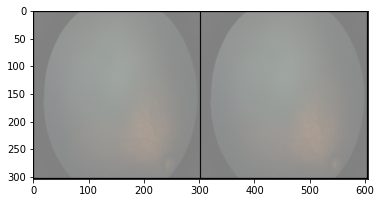

In [13]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
 
data_transfrom = transforms.Compose([  # 图片读取样式
    transforms.Resize((300, 300)),     
    transforms.ToTensor(),             # 向量化,向量化时 每个点的像素值会除以255,整个向量中的元素值都在0-1之间      
])
 
img = datasets.ImageFolder('../autodl-tmp/test', transform=data_transfrom)  # 指明读取的文件夹和读取方式,注意指明的是到文件夹的路径,不是到图片的路径
 
imgLoader = torch.utils.data.DataLoader(img, batch_size=2, shuffle=False, num_workers=1)  # 指定读取配置信息
 
inputs, _ = next(iter(imgLoader))
print(_[0].item())           # 打印返回的值
inputs = inputs / 2 + 0.5    # 使得整个图像的像素值都在0.5之上，使得处理后的图像偏白
inputs = torchvision.utils.make_grid(inputs)   # make_grid()实现图片的拼接，并去除原本Tesor中Batch_Size那一维度,因为操作之前的inputs是4维的, make_grid()返回的结果是3维的, shape为(3, h, w) 3代表通道数, w,h代表拼接后图片的宽高
inputs = inputs.numpy().transpose((1, 2, 0))   # transpose((1, 2, 0)) 是将(3, h, w) 变为 (h ,w, 3), 因为这种格式才是图像存储的标准格式
plt.imshow(inputs)           # 展示,这里会一块展示batch_size张图片,因为它们是一块被读出来的
plt.show()